# `qp` Demo

In this notebook we use the `qp` module to approximate some standard 1-D PDFs using sets of quantiles, and assess the accuracy of the quantile parametrization(TM).

### Requirements

To run `qp`, you will need to first install the module. 

In [1]:
import numpy as np
import scipy.stats as sps
import scipy.interpolate as spi
import matplotlib.pyplot as plt
%matplotlib inline

import pdf

## The `qp.PDF` Class

This is the basic element of `qp` - an object representing a probability density function.

In [ ]:
# This now exists in a separate module.  Classes will not appear in the notebook!

# class PDF(object):
    
#     def __init__(self, truth=None):
#         self.truth = truth
        
#     def evaluate(self, loc):
        
#         return
        
#     def integrate(self, bounds):
        
#         return
        
#     def quantize(self):
        
#         return
        
#     def interpolate(self):
        
#         return
        
#     def plot(self, limits):
        
#         x = np.linspace(limits[0], limits[1], 100)
#         plt.plot(x, self.truth.pdf(x), 'r-', lw=5, alpha=0.6, label='true pdf')
#         plt.legend()
#         plt.xlabel('x')
#         plt.ylabel('probability density')
#         plt.savefig('plot.png')
        
#         return
        

## Approximating a Gaussian

Let's summon a PDF object, and initialize it with a standard functiom - a Gaussian.

In [2]:
dist = sps.norm(loc=0, scale=1)
p = pdf.PDF(truth=dist)

Let's visualize the PDF object in order to compare the truth and the approximation.

[ 0.1         0.18888889  0.27777778  0.36666667  0.45555556  0.54444444
  0.63333333  0.72222222  0.81111111  0.9       ]
[-1.28155157 -0.88199821 -0.5894558  -0.34069483 -0.11163715  0.11163715
  0.34069483  0.5894558   0.88199821  1.28155157]


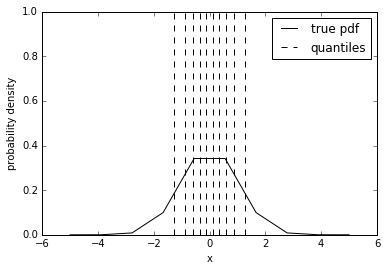

In [4]:
bounds = (-5.0, 5.0)
npoints = 10
p.plot(limits=bounds, num_points=npoints)

Relevant code I've already written for other purposes below:

In [ ]:
# """
# util-sim module defines handy tools used in data generation
# """

# import sys
# import numpy as np
# import scipy as sp
# #import random
# import bisect

# np.random.seed(seed=0)

# def lrange(x):
#     """
#     lrange makes a range based on the length of a list or array l
#     """
#     return xrange(len(x))

# def safelog(xarr):
#     """
#     safelog takes log of array with zeroes
#     """
#     shape = np.shape(xarr)
#     flat = xarr.flatten()
#     logged = np.log(np.array([max(x,sys.float_info.epsilon) for x in flat]))
#     return logged.reshape(shape)

# def extend(arr,front,back):
#     """
#     extend appends zeroes to ends of array
#     """
#     return np.concatenate((np.array([sys.float_info.epsilon]*len(front)),arr,np.array([sys.float_info.epsilon]*len(back))),axis=0)

# # tools for sampling an arbitrary discrete distribution, used in data generation
# def cdf(weights):
#     """
#     cdf takes weights and makes them a normalized CDF
#     """
#     tot = sum(weights)
#     result = []
#     cumsum = 0.
#     for w in weights:
#       cumsum += w
#       result.append(cumsum/tot)
#     return result

# def choice(pop, weights):
#     """
#     choice takes a population and assigns each element a value from 0 to len(weights) based on CDF of weights
#     """
#     assert len(pop) == len(weights)
#     cdf_vals = cdf(weights)
#     x = np.random.random()
#     index = bisect.bisect(cdf_vals,x)
#     return pop[index]

# def normed(x,scale):
#     """
#     normed takes a numpy array and returns a normalized version of it that integrates to 1
#     """
#     x = np.array(x)
#     scale = np.array(scale)
#     norm = x/np.dot(x,scale)
#     return norm

# class tnorm(object):
#     def __init__(self,mu,sig,ends):
#         self.mu = mu
#         self.sig = sig
#         (self.min,self.max) = ends
#         self.lo = self.loc(self.min)
#         self.hi = self.loc(self.max)

#     def loc(self,z):
#         return (z-self.mu)/self.sig

#     def phi(self,z):
#         x = z/np.sqrt(2)
#         term = sp.special.erf(x)
#         return (1.+term)/2.

#     def norm(self):
#         return max(sys.float_info.epsilon,self.phi(self.hi)-self.phi(self.lo))

#     def pdf(self,z):
#         x = self.loc(z)
#         pdf = sp.stats.norm.pdf(x)
#         return pdf/(self.sig*self.norm())

#     def cdf(self,z):
#         x = self.loc(z)
#         cdf = self.phi(x)-self.phi(self.lo)
#         result = cdf/self.norm()
#         #print('a cdf: {}/{}'.format(result,z))
#         return result

#     def rvs(self,J):
#         func = sp.stats.truncnorm(self.lo,self.hi,loc=self.mu,scale=self.sig)
#         return func.rvs(size=J)

# class gmix(object):
#     """
#     gmix object takes a numpy array of Gaussian parameters and enables computation of PDF
#     """
#     def __init__(self,inarr,bounds):

#         self.minZ,self.maxZ = bounds
#         self.comps = inarr
#         self.ncomps = len(self.comps)

#         self.weights = np.transpose(self.comps)[2]
#         self.weights = self.weights/sum(self.weights)
# #         mincomps = [(self.minZ-comp[0])/comp[1] for comp in self.comps]
# #         maxcomps = [(self.maxZ-comp[0])/comp[1] for comp in self.comps]
#         self.comps = [tnorm(comp[0],comp[1],(self.minZ,self.maxZ)) for comp in self.comps]#[sp.stats.truncnorm(mincomps[c],maxcomps[c],loc=self.comps[c][0],scale=self.comps[c][1]) for c in lrange(self.comps)]
# #         self.comps = [tnorm(comp[0],comp[1],(self.minZ,self.maxZ)) for comp in self.comps]
# #         self.weights = np.array([self.calccdf(c,self.minZ,self.maxZ) for c in lrange(self.comps)])

#     def pdfs(self,zs):
#         print('zs.shape={}'.format(np.shape(zs)))
#         out = np.array([self.weights[c]*self.comps[c].pdf(zs) for c in xrange(self.ncomps)])
#         print('pdfs.out.shape={}'.format(np.shape(out)))
#         return out

#     def pdf(self,zs):
#         out = np.sum(self.pdfs(zs),axis=0)
#         print('pdf.out.shape={}'.format(np.shape(out)))
#         return out

#     def cdfs(self,zs):
#         out = np.array([self.weights[c]*self.comps[c].cdf(zs) for c in xrange(self.ncomps)])
#         return out

#     def cdf(self,zs):
#         out = np.sum(self.cdfs(zs),axis=0)
#         return out

#     def binned(self,zs):
#         thing = self.cdf(zs)
#         return thing[1:]-thing[:-1]

#     def sample(self,N):
#         choices = [0]*self.ncomps
#         for j in xrange(N):
#             choices[choice(xrange(self.ncomps), self.weights)] += 1
#         samps = np.array([])
#         for c in xrange(self.ncomps):
#             j = choices[c]
#             Zs = self.comps[c].rvs(j)
#             samps = np.concatenate((samps,Zs))
#         return np.array(samps)

# class cont(object):
#     """
#     cont object takes a numpy array of normalized discrete distribution and its range and enables computation of PDF
#     """
#     def __init__(self,inarr,bounds):

#         self.ndim = len(inarr)
#         self.Zs = bounds
#         self.difs = self.Zs[1:]-self.Zs[:-1]
#         self.weights = inarr/np.dot(inarr,self.difs)
# #         mincomps = [(self.minZ-comp[0])/comp[1] for comp in self.comps]
# #         maxcomps = [(self.maxZ-comp[0])/comp[1] for comp in self.comps]
#         self.dims = [uniform(loc=self.Zs[k],scale=self.difs[k]) for k in xrange(self.ndim)]#[sp.stats.truncnorm(mincomps[c],maxcomps[c],loc=self.comps[c][0],scale=self.comps[c][1]) for c in lrange(self.comps)]
# #         self.comps = [tnorm(comp[0],comp[1],(self.minZ,self.maxZ)) for comp in self.comps]
# #         self.weights = np.array([self.calccdf(c,self.minZ,self.maxZ) for c in lrange(self.comps)])

#     def pdf(self,zs):
#         out = np.array([self.weights[k]*np.array([self.dims[k].pdf(z) for z in zs]) for k in xrange(self.ndim)])
#         return out

#     def cdf(self,zs):
#         out = np.array([self.weights[k]*np.array([self.dims[k].cdf(z) for z in zs]) for k in xrange(self.ndim)])
#         return out

#     def sample(self,N):
#         choices = [0]*self.ndim
#         for j in xrange(N):
#             choices[choice(xrange(self.ndim), self.weights)] += 1
#         samps = np.array([])
#         for k in xrange(self.ndim):
#             j = choices[k]
#             Zs = self.dims[k].rvs(j)
#             samps = np.concatenate((samps,Zs))
#         return np.array(samps)

# def makelf(truZ,zfactor,elements,outlier=None):#,dgen=None):

#     if outlier is None:
#         outlier = []

#     mixmod = [[truZ+elem.shift,elem.stddev*zfactor,elem.weight] for elem in elements]
#     mixmod.extend([[elem.obsZ,elem.stddev,elem.weight] for elem in outlier])

#     lf = mixmod

#     return(lf)#,dgen)

# def makepdf(grid,truZ,gal,intp=None,dgen=None,outlier=None):

#     elements = gal.elements

#     zfactor = gal.makezfactor(truZ)

#     difs = grid[1:]-grid[:-1]
#     dif = difs[np.argmin(grid-truZ)]
#     allsummed = np.zeros(len(grid)-1)

#     lf = makelf(truZ,zfactor,elements,outlier=outlier)#,dgen)

#     pdf = gmix(lf,(min(grid),max(grid)))

#     if dgen != None:
#         dgdist = gmix(dgen,(min(grid),max(grid)))
#         const = dgdist.pdf(truZ)*dif
#     else:
#         const = 0.

#     cdf = pdf.cdf(grid)
#     spread = cdf[1:]-cdf[:-1]
#     allsummed += spread
#     allsummed += const
#     if intp != None:
#         pf = intp*allsummed
#     else:
#         pf = allsummed
#     pf = np.array(pf)
#     #pf = pf/max(np.dot(pf,difs),sys.float_info.epsilon)

#     return(pf)

In [ ]:
# """
# util-mcmc module defines handy tools for MCMC
# """

# import sys
# import numpy as np
# import statistics
# import cPickle as cpkl
# import scipy as sp

# def lrange(l):
#     """
#     lrange(l) makes a range based on the length of a list or array l
#     """
#     return xrange(len(l))

# def safelog(xarr):
#     """
#     safelog takes log of array with zeroes
#     """
#     shape = np.shape(xarr)
#     flat = xarr.flatten()
#     logged = np.log(np.array([max(x,sys.float_info.epsilon) for x in flat]))
#     return logged.reshape(shape)

# def normed(x,scale):
#     """
#     normed takes a numpy array and returns a normalized version of it that integrates to 1
#     """
#     x = np.array(x)
#     scale = np.array(scale)
#     norm = x/np.dot(x,scale)
#     return norm

# class mvn(object):
#     """
#     mvn object is multivariate normal distribution, to be used in data generation and prior to emcee
#     """
#     def __init__(self, mean, cov):
#         """input multidimensional mean and covariance matrix as numpy arrays"""
#         self.dims = len(mean)
#         self.mean = mean
#         self.cov = cov
#         self.icov = np.linalg.pinv(self.cov, rcond=sys.float_info.epsilon)
#         (self.logdetsign, self.logdet) = np.linalg.slogdet(self.cov)

#     def logpdf(self, x):
#         """log probabilities"""
#         delta = x - self.mean
#         c = np.dot(delta, np.dot(self.icov, delta))
#         prob = -0.5 * c
#         return prob

#     def sample_ps(self, W):
#         """W samples directly from distribution"""
#         outsamp = np.random.multivariate_normal(self.mean, self.cov, W)
#         return (outsamp, self.mean)

#     def sample_gm(self,W):
#         """W samples around mean of distribution"""
#         outsamp = [self.mean+np.random.randn(self.dims) for w in range(0,W)]
#         return (outsamp, self.mean)

#     def sample_gs(self, W):
#         """W samples from a single sample from distribution"""
#         rando = np.random.multivariate_normal(self.mean, self.cov)
#         #outsamp = [rando + np.sqrt(rando)*np.random.randn(self.dims) for w in range(0,W)]
#         outsamp = [np.random.multivariate_normal(rando,self.cov) for w in range(0,W)]
#         return (outsamp, rando)

# class post(object):
#     """
#     post object is posterior distribution we wish to sample
#     """
#     def __init__(self,idist,xvals,yprobs,interim):
#         """data are logged posteriors (ngals*nbins), idist is mvn object"""
#         self.prior = idist
#         #self.priormean = idist.mean
#         self.interim = interim
#         self.xgrid = np.array(xvals)
#         self.difs = self.xgrid[1:]-self.xgrid[:-1]#np.array([self.xgrid[k+1]-self.xgrid[k] for k in self.dims])
#         self.lndifs = np.log(self.difs)#np.array([m.log(max(self.difs[k],sys.float_info.epsilon)) for k in self.dims])
#         self.postprobs = yprobs
#         self.constterm = self.lndifs-self.interim#self.priormean
#         self.lnprob_ext = post_lnprob

#     def priorprob(self,theta):
#         """this is proportional to log prior probability"""
#         return self.prior.logpdf(theta)

#     def lnlike(self,theta):
#         """specific to N(z) problem"""
#         #return self.lnprob(theta)-self.priorprob(theta)
#         constterms = theta+self.constterm
#         sumterm = -1.*np.dot(np.exp(theta),self.difs)
#         for j in lrange(self.postprobs):
#             logterm = np.log(np.sum(np.exp(self.postprobs[j]+constterms)))
#             sumterm += logterm
#         return sumterm

#     def mlnlike(self,theta):
#         return -1.*self.lnlike(theta)

#     # speed this up some more with matrix magic?
#     def lnprob(self,theta):
#         """calculate log posterior probability"""
# #         constterms = theta+self.constterm
# #         sumterm = self.priorprob(theta)-np.dot(np.exp(theta),self.difs)#this should sufficiently penalize poor samples but somehow fails on large datasets
# #         for j in lrange(self.postprobs):
# #             #logterm = sp.misc.logsumexp(self.postprobs[j]+constterms)#shockingly slower!
# #             #logterm = np.logaddexp(self.postprobs[j]+constterms)#only works for two terms
# #             logterm = np.log(np.sum(np.exp(self.postprobs[j]+constterms)))
# #             sumterm += logterm
# #         return sumterm
#         return self.lnlike(theta)+self.priorprob(theta)

# def post_lnprob(theta, other_self):
#     ret = other_self.lnprob(theta)
#     return ret

# class path(object):
#     """
#     path object takes templates of path style and variables for it and makes os.path objects from them
#     """
#     def __init__(self, path_template, filled = None):
#         self.path_template = path_template
#         if filled is None:
#             self.filled = {}
#         else:
#             self.filled = filled

#     def construct(self, **args):
#         """actually constructs the final path, as a string.  Optionally takes in any missing parameters"""
#         nfilled = self.filled.copy()
#         nfilled.update(args)
#         return self.path_template.format(**nfilled)

#     def fill(self, **args):
#         """fills any number of missing parameters, returns new object"""
#         dct = self.filled.copy()
#         dct.update(args)
#         return path(self.path_template, dct)

# class tnorm(object):
#     """truncated normal distribution object"""
#     def __init__(self,mu,sig,ends):
#         self.mu = mu
#         self.sig = sig
#         (self.min,self.max) = ends
#         self.lo = self.loc(self.min)
#         self.hi = self.loc(self.max)

#     def loc(self,z):
#         return (z-self.mu)/self.sig

#     def phi(self,z):
#         x = z/np.sqrt(2)
#         term = sp.special.erf(x)
#         return (1.+term)/2.

#     def norm(self):
#         return max(sys.float_info.epsilon,self.phi(self.hi)-self.phi(self.lo))

#     def pdf(self,z):
#         x = self.loc(z)
#         pdf = sp.stats.norm.pdf(x)
#         return pdf/(self.sig*self.norm())

#     def cdf(self,z):
#         x = self.loc(z)
#         cdf = self.phi(x)-self.phi(self.lo)
#         return cdf/self.norm()

#     def rvs(self,J):
#         func = sp.stats.truncnorm(self.lo,self.hi,loc=self.mu,scale=self.sig)
#         return func.rvs(size=J)

# class gmix(object):
#     """
#     gmix object takes a numpy array of Gaussian parameters and enables computation of PDF
#     """
#     def __init__(self,inarr,bounds):

#         self.minZ,self.maxZ = bounds
#         self.comps = inarr
#         self.ncomps = len(self.comps)

#         self.weights = np.transpose(self.comps)[2]
# #         mincomps = [(self.minZ-comp[0])/comp[1] for comp in self.comps]
# #         maxcomps = [(self.maxZ-comp[0])/comp[1] for comp in self.comps]
#         self.comps = [tnorm(comp[0],comp[1],(self.minZ,self.maxZ)) for comp in self.comps]#[sp.stats.truncnorm(mincomps[c],maxcomps[c],loc=self.comps[c][0],scale=self.comps[c][1]) for c in lrange(self.comps)]
# #         self.comps = [tnorm(comp[0],comp[1],(self.minZ,self.maxZ)) for comp in self.comps]
# #         self.weights = np.array([self.calccdf(c,self.minZ,self.maxZ) for c in lrange(self.comps)])

#     def pdfs(self,zs):
#         out = np.array([self.weights[c]*np.array([self.comps[c].pdf(z) for z in zs]) for c in xrange(self.ncomps)])
#         return out

#     def pdf(self,zs):
#         return np.sum(self.pdfs(zs),axis=0)

#     def cdfs(self,zs):
#         out = np.array([self.weights[c]*np.array([self.comps[c].cdf(z) for z in zs]) for c in xrange(self.ncomps)])
#         return out

#     def cdf(self,zs):
#         return np.sum(self.cdfs(zs),axis=0)

#     def binned(self,zs):
#         thing = self.cdf(zs)
#         return thing[1:]-thing[:-1]

#     def sample(self,N):
#         choices = [0]*self.ncomps
#         for j in xrange(N):
#             choices[choice(xrange(self.ncomps), self.weights)] += 1
#         samps = np.array([])
#         for c in xrange(self.ncomps):
#             j = choices[c]
#             Zs = self.comps[c].rvs(j)
#             samps = np.concatenate((samps,Zs))
#         return np.array(samps)

In [ ]:
# """
# stat-mcmc module calculates intermediate statistics for monitoring state
# """

# import statistics
# import numpy as np
# import cPickle as cpkl
# import os
# import scipy as sp
# import csv

# import utilmcmc as um

# class calcstats(object):
#     """
#     object class to set up and calculate summary statistics, unite stats for each output
#     """
#     def __init__(self, meta):
#         self.meta = meta
#     def update(self, ydata):
#         if self.meta.plotonly == False:
#             stats = self.compute(ydata)
#             self.meta.key.add_stats(self.meta.topdir, self.name, stats)

# # # statistics involving both log posterior probabilities and parameter values
# # class stat_both(calcstats):
# #     """
# #     calculates statistics that require both posterior probabilities and parameter values: log likelihood ratio and MAP parameter values
# #     """
# #     def __init__(self,meta):
# #         calcstats.__init__(self,meta)

# #         self.name = 'both'

# #         self.ll_stk = self.meta.postdist.lnlike(self.meta.logstkNz)
# # #         self.ll_map = self.meta.postdist.lnlike(self.meta.logmapNz)
# # #         self.ll_exp = self.meta.postdist.lnlike(self.meta.logexpNz)
# #         self.ll_int = self.meta.postdist.lnlike(self.meta.logintNz)
# #         self.ll_mml = self.meta.postdist.lnlike(self.meta.logmmlNz)
# #         self.ll_smp = []
# # #         self.mapvals,self.maps = [],[]

# # #         self.llr_stk,self.llr_map,
# #         self.llr_stk,self.llr_int,self.llr_mml = [],[],[]

# #         outdict = {'ll_stk': self.ll_stk,
# # #                   'll_map': self.ll_map,
# # #                   'll_exp': self.ll_exp,
# #                   'll_int': self.ll_int,
# #                   'll_mml': self.ll_mml,
# #                   'll_smp': self.ll_smp,
# #                   'llr_stk': np.array(self.llr_stk),
# # #                   'llr_map': np.array(self.llr_map),
# # #                   'llr_exp': np.array(self.llr_exp),
# #                   'llr_int': np.array(self.llr_int),
# #                   'llr_mml': np.array(self.llr_mml)
# #                    }
# #         if self.meta.plotonly == False:
# #             with open(os.path.join(self.meta.topdir,'stat_both.p'),'wb') as statboth:
# #                 cpkl.dump(outdict,statboth)

# #     def compute(self,ydata):

# #         self.probs = ydata['probs']
# #         self.chains = ydata['chains']

# # #         where = np.unravel_index(np.argmax(self.probs),(self.meta.nwalkers,self.meta.ntimes))
# # #         self.mapvals.append(self.chains[where])
# # #         self.maps.append(self.probs[where])

# #         self.llr_stk = self.calclr(self.llr_stk,self.ll_stk)
# # #         self.llr_map = self.calclr(self.llr_map,self.ll_map)
# # #         self.llr_exp = self.calclr(self.llr_exp,self.ll_exp)
# #         self.llr_mml = self.calclr(self.llr_mml,self.ll_mml)

# #         if self.meta.logtruNz is not None:
# #             self.calclr(self.ll_smp,0.)

# #         with open(os.path.join(self.meta.topdir,'stat_both.p'),'rb') as indict:
# #             outdict = cpkl.load(indict)

# #         outdict['llr_stk'] = np.array(self.llr_stk)
# # #         outdict['llr_map'] = np.array(self.llr_map)
# # #         outdict['llr_exp'] = np.array(self.llr_exp)
# #         outdict['llr_mml'] = np.array(self.llr_mml)
# #         outdict['ll_smp'] = np.array(self.ll_smp).flatten()/2.
# # #         outdict['mapvals'] = np.array(self.mapvals)
# # #         outdict['maps'] = np.array(self.maps)

# #         with open(os.path.join(self.meta.topdir,'stat_both.p'),'wb') as statboth:
# #             cpkl.dump(outdict,statboth)
# #         return

# #     # likelihood ratio test
# #     def calclr(self,var,ll):

# #         for w in xrange(self.meta.nwalkers):
# #             for x in xrange(self.meta.ntimes):
# #                 ll_smp = self.probs[w][x]-self.meta.postdist.priorprob(self.chains[w][x])
# #                 var.append(2.*(ll_smp-ll))
# # #                 self.llr_stk.append(2.*ll_smp-2.*self.ll_stk)
# # #                 self.llr_map.append(2.*ll_smp-2.*self.ll_map)
# # #                 self.llr_exp.append(2.*ll_smp-2.*self.ll_exp)
# #         return(var)

# class stat_chains(calcstats):
#     """
#     calculates statistics that need parameter values: variance, chi^2, KLD; statistics involving parameter values
#     """
#     def __init__(self, meta):
#         calcstats.__init__(self, meta)

#         self.name = 'chains'

#         self.var_ls = []
#         self.var_s = []
# #         self.vslogstk = None
# #         self.vslogmap = None
# # #         self.vslogexp = None
# #         self.vsstk = None
# #         self.vsmap = None
# # #         self.vsexp = None

#         self.chi_ls = []
#         self.chi_s = []
# #         self.cslogstk = None
# #         self.cslogmap = None
# # #         self.cslogexp = None
# #         self.csstk = None
# #         self.csmap = None
# # #         self.csexp = None

#         self.kl_stkvtru,self.kl_truvstk = None,None
#         self.kl_mapvtru,self.kl_truvmap = None,None
#         self.kl_expvtru,self.kl_truvexp = None,None
#         self.kl_intvtru,self.kl_truvint = float('inf'),float('inf')
#         self.kl_mmlvtru,self.kl_truvmml = float('inf'),float('inf')
#         self.kl_smpvtru,self.kl_truvsmp = float('inf'),float('inf')

#         if self.meta.logtruNz is not None:
# #             vslogstk = self.meta.logstkNz-self.meta.logtruNz
# #             self.vslogstk = np.dot(vslogstk,vslogstk)
# #             vslogmap = self.meta.logmapNz-self.meta.logtruNz
# #             self.vslogmap = np.dot(vslogmap,vslogmap)
# # #             vslogexp = self.meta.logexpNz-self.meta.logtruNz
# # #             self.vslogexp = np.dot(vslogexp,vslogexp)

# #             self.cslogstk = np.average((self.meta.logstkNz-self.meta.logtruNz)**2)
# #             self.cslogmap = np.average((self.meta.logmapNz-self.meta.logtruNz)**2)
# # #             self.cslogexp = np.average((self.meta.logexpNz-self.meta.logtruNz)**2)

#             self.kl_stkvtru,self.kl_truvstk = calckl(self.meta.bindifs,self.meta.logstkNz,self.meta.logtruNz)
#             self.kl_mapvtru,self.kl_truvmap = calckl(self.meta.bindifs,self.meta.logmapNz,self.meta.logtruNz)
#             self.kl_expvtru,self.kl_truvexp = calckl(self.meta.bindifs,self.meta.logexpNz,self.meta.logtruNz)
#             self.kl_intvtru,self.kl_truvint = calckl(self.meta.bindifs,self.meta.logintNz,self.meta.logtruNz)
#             self.kl_mmlvtru,self.kl_truvmml = calckl(self.meta.bindifs,self.meta.logmmlNz,self.meta.logtruNz)
#             self.kl_smpvtru,self.kl_truvsmp = [],[]

# #         if self.meta.truNz is not None:
# #             vsstk = meta.stkNz-meta.truNz
# #             self.vsstk = np.dot(vsstk,vsstk)
# #             vsmap = meta.mapNz-meta.truNz
# #             self.vsmap = np.dot(vsmap,vsmap)
# # #             vsexp = meta.expNz-meta.truNz
# # #             self.vsexp = np.dot(vsexp,vsexp)

# #             self.csstk = np.average((self.meta.stkNz-self.meta.truNz)**2)
# #             self.csmap = np.average((self.meta.mapNz-self.meta.truNz)**2)
# #             self.csexp = np.average((self.meta.expNz-self.meta.truNz)**2)

#         outdict = {#'vslogstk': self.vslogstk,
# #                    'vsstk': self.vsstk,
# #                    'vslogmap': self.vslogmap,
# #                    'vsmap': self.vsmap,
# # #                    'vslogexp': self.vslogexp,
# # #                    'vsexp': self.vsexp,
# #                    'cslogstk': self.cslogstk,
# #                    'csstk': self.csstk,
# #                    'cslogmap': self.cslogmap,
# #                    'csmap': self.csmap,
# # #                    'cslogexp': self.cslogexp,
# # #                    'csexp': self.csexp,
#                    'kl_stkvtru': self.kl_stkvtru,
#                    'kl_mapvtru': self.kl_mapvtru,
#                    'kl_expvtru': self.kl_expvtru,
#                    'kl_smpvtru': self.kl_smpvtru,
#                    'kl_intvtru': self.kl_intvtru,
#                    'kl_mmlvtru': self.kl_mmlvtru,
#                    'kl_truvstk': self.kl_truvstk,
#                    'kl_truvmap': self.kl_truvmap,
#                    'kl_truvexp': self.kl_truvexp,
#                    'kl_truvsmp': self.kl_truvsmp,
#                    'kl_truvint': self.kl_truvint,
#                    'kl_truvmml': self.kl_truvmml
#               }
#         if self.meta.plotonly == False:
#             with open(os.path.join(self.meta.topdir,'stat_chains.p'),'wb') as statchains:
#                 cpkl.dump(outdict,statchains)

#     def compute(self, ydata):#ntimes*nwalkers*nbins

#         self.ydata = ydata
#         self.eydata = np.exp(self.ydata)

# #         print('about to write samples to file: '+str(self.meta.key.burnin))
# #         if self.meta.key.burnin == False:

#         with open(self.meta.samples,'ab') as csvfile:
#             out = csv.writer(csvfile,delimiter=' ')
#             for w in xrange(self.meta.nwalkers):
#                 out.writerows(self.ydata[w])#[[x for x in row] for row in self.ydata])
# #             print(str(self.meta.key.burnin)+'wrote samples to file')
# #         else:
# #             print('not writing samples to file because still burning in: '+str(self.meta.key.burnin))

#         y = np.swapaxes(self.ydata.T,0,1).T#nwalkers*nbins*ntimes
#         ey = np.swapaxes(self.eydata.T,0,1).T#np.exp(y)

#         if self.meta.logtruNz is None:
#             my = np.array([[[sum(by)/len(by)]*self.meta.ntimes for by in wy] for wy in y])#nwalkers*nbins*ntimes
#             mey = np.array([[[sum(bey)/len(bey)]*self.meta.ntimes for bey in wey] for wey in ey])#nwalkers*nbins*ntimes
#         else:
#             my = np.array([[[k]*self.meta.ntimes for k in self.meta.logtruNz]]*self.meta.nwalkers)#nwalkers*nbins*ntimes
#             mey = np.array([[[k]*self.meta.ntimes for k in self.meta.truNz]]*self.meta.nwalkers)#nwalkers*nbins*ntimes

#         self.sy = np.swapaxes((y-my),1,2)#nwalkers*ntimes*nbins to #nwalkers*nbins*ntimes
#         self.sey = np.swapaxes((ey-mey),1,2)

#         self.var_ls = self.calcvar(self.var_ls,self.sy)
#         self.var_s = self.calcvar(self.var_s,self.sey)
#         self.chi_ls = self.calcchi(self.chi_ls,self.sy,self.ydata)
#         self.chi_s = self.calcchi(self.chi_s,self.sey,self.eydata)

#         with open(os.path.join(self.meta.topdir,'stat_chains.p'),'rb') as indict:
#             outdict = cpkl.load(indict)

# #         outdict['kl_smpvtru'] = np.array(self.kl_smpvtru)
# #         outdict['kl_truvsmp'] = np.array(self.kl_truvsmp)
#         #outdict['tot_var_ls'] = self.tot_var_ls
#         #outdict['tot_var_s'] = self.tot_var_s
#         outdict['var_ls'] = self.var_ls
#         outdict['var_s'] = self.var_s
#         #outdict['tot_chi_ls'] = self.tot_chi_ls
#         #outdict['tot_chi_s'] = self.tot_chi_s
#         outdict['chi_ls'] = self.chi_ls
#         outdict['chi_s'] = self.chi_s

#         with open(os.path.join(self.meta.topdir,'stat_chains.p'),'wb') as indict:
#             cpkl.dump(outdict,indict)
#             #print('after addition'+str(outdict))
# #         return { 'vslogstk': self.vslogstk,
# #                'vsstk': self.vsstk,
# #                'vslogmap': self.vslogmap,
# #                'vsmap': self.vsmap,
# #                'vslogexp': self.vslogexp,
# #                'vsexp': self.vsexp,
# #                'tot_var_ls': self.tot_var_ls,
# #                'tot_var_s': self.tot_var_s,
# #                'var_ls': self.var_ls,
# #                'var_s': self.var_s
# #               }

#     def calcvar(self,var,s):
#         """variance of samples"""
#         ans = np.average([[np.dot(s[w][i],s[w][i]) for i in xrange(len(s[w]))] for w in xrange(len(s))])
#         var.append(ans)
# #         var_ls = np.average([[np.dot(self.sy[w][i],self.sy[w][i]) for i in xrange(self.meta.ntimes)] for w in xrange(self.meta.nwalkers)])#/float(self.meta.nwalkers*self.meta.ntimes*self.meta.nbins)
# #         var_s = np.average([[np.dot(self.sey[w][i],self.sey[w][i]) for i in xrange(self.meta.ntimes)] for w in xrange(self.meta.nwalkers)])#/float(self.meta.nwalkers*self.meta.ntimes*self.meta.nbins)
# #         self.var_ls.append(var_ls)
# #         self.var_s.append(var_s)
#         #self.tot_var_ls = self.tot_var_ls+var_ls
#         #self.tot_var_s = self.tot_var_s+var_s
#         #print(self.meta.name+' var_ls='+str(self.var_ls))
#         #print(self.meta.name+' var_s='+str(self.var_s))
#         return(var)

#     def calcchi(self,var,s,data):
#         """chi^2 (or Wald test) of samples"""
#         v = np.sum([np.average([statistics.variance(walk) for walk in data.T[b]]) for b in xrange(len(data.T))])#abs(np.linalg.det(np.cov(flatdata)))
#         ans = np.average(s**2)/v
#         var.append(ans)

# #         flatdata = np.array([self.ydata.T[b].flatten() for b in xrange(self.meta.nbins)])
# #         eflatdata = np.exp(flatdata)

# #         vy = np.sum([np.average([statistics.variance(walk) for walk in self.ydata.T[b]]) for b in xrange(self.meta.nbins)])#abs(np.linalg.det(np.cov(flatdata)))
# #         vey = np.sum([np.average([statistics.variance(walk) for walk in self.eydata.T[b]]) for b in xrange(self.meta.nbins)])#abs(np.linalg.det(np.cov(eflatdata)))

# #         chi_ls = np.average(self.sy**2)/vy#np.average(sp.stats.chisquare(flatdata.T)[0])#float(self.meta.nwalkers*self.meta.ntimes*self.meta.nbins*vy)
# #         chi_s = np.average(self.sey**2)/vey#np.average(sp.stats.chisquare(eflatdata.T)[0])#float(self.meta.nwalkers*self.meta.ntimes*self.meta.nbins*vey)
# #         self.chi_ls.append(chi_ls)
# #         self.chi_s.append(chi_s)
# #         #self.tot_chi_ls = self.tot_chi_ls+chi_ls
# #         #self.tot_chi_s = self.tot_chi_s+chi_s
# #         print(self.meta.name+' chi_ls='+str(self.chi_ls))
# #         print(self.meta.name+' chi_s='+str(self.chi_s))
#         return(var)

# class stat_probs(calcstats):
#     """
#     calculates statistics requiring only probabilities:  log posterior probability for alternatives, variance of probabilities
#     """
#     def __init__(self, meta):
#         calcstats.__init__(self, meta)
#         #self.summary = 0
#         self.name = 'probs'

# #         # calculating log likelihood ratio test statistic for each relative to truth (and true relative to prior)
#         if self.meta.logtruNz is not None:
#             self.lp_tru = self.meta.postdist.lnprob(self.meta.logtruNz)
#             self.lik_tru = self.meta.postdist.lnlike(self.meta.logtruNz)
#         else:
#             self.lp_tru = self.meta.postdist.lnprob(self.meta.mean)
#             self.lik_tru = self.meta.postdist.lnlike(self.meta.mean)

#         self.lp_int = self.meta.postdist.lnprob(self.meta.logintNz)
#         self.lp_stk = self.meta.postdist.lnprob(self.meta.logstkNz)
#         self.lp_map = self.meta.postdist.lnprob(self.meta.logmapNz)
#         self.lp_exp = self.meta.postdist.lnprob(self.meta.logexpNz)
#         self.lp_mml = self.meta.postdist.lnprob(self.meta.logmmlNz)

#         self.var_y = []

#         outdict = {'var_y': self.var_y,
#                    'lp_tru': self.lp_tru,
#                    'lp_int': self.lp_int,
#                    'lp_stk': self.lp_stk,
#                    'lp_map': self.lp_map,
#                    'lp_exp': self.lp_exp,
#                    'lp_mml': self.lp_mml
#                   }

#         if self.meta.plotonly == False:
#             with open(os.path.join(self.meta.topdir,'stat_probs.p'),'wb') as statprobs:
#                 cpkl.dump(outdict,statprobs)

#     def compute(self, ydata):
#         y = np.swapaxes(ydata,0,1).T
#         var_y = sum([statistics.variance(y[w]) for w in xrange(self.meta.nwalkers)])/self.meta.nwalkers
#         #self.llr_smp.append((2.*np.max(lik_y)-2.*self.ll_tru))
#         self.var_y.append(var_y)
#         # self.summary = self.summary+var_y

#         with open(os.path.join(self.meta.topdir,'stat_probs.p'),'rb') as indict:
#             outdict = cpkl.load(indict)

#         outdict['var_y'] = self.var_y

#         with open(os.path.join(self.meta.topdir,'stat_probs.p'),'wb') as statprobs:
#             cpkl.dump(outdict,statprobs)

# #         return { #'summary': self.summary,
# #                  'var_y': self.var_y,
# #                  'lp_tru': self.lp_tru,
# # #                  'lp_stk': self.lp_stk,
# # #                  'lp_map': self.lp_map,
# # # #                  'lp_exp': self.lp_exp
# #                  'lp_mml': self.lp_mml
# #                }

# # class stat_fracs(calcstats):
# #     """
# #     calculates summary statistics on acceptance fractions
# #     """
# #     def __init__(self, meta):
# #         calcstats.__init__(self, meta)
# #         self.var_y = []
# #         self.name = 'fracs'
# #     def compute(self, ydata):
# #         y = ydata.T
# #         var_y = statistics.variance(y)
# #         self.var_y.append(var_y)
# #         return {'var_y': self.var_y}

# class stat_times(calcstats):
#     """
#     calculates summary statistics on autocorrelation times
#     """
#     def __init__(self, meta):
#         calcstats.__init__(self, meta)
#         self.var_y = []
#         self.name = 'times'
#     def compute(self, ydata):
#         y = ydata.T
#         var_y = np.var(y)
#         self.var_y.append(var_y)
#         return {'var_y': self.var_y}

# def cft(xtimes,lag):
#     """calculate autocorrelation times since emcee sometimes fails"""
#     lent = len(xtimes)-lag
#     allt = xrange(lent)
#     ans = np.array([xtimes[t+lag]*xtimes[t] for t in allt])
#     return ans

# def cf(xtimes):#xtimes has ntimes elements
#     cf0 = np.dot(xtimes,xtimes)
#     allt = xrange(len(xtimes)/2)
#     cf = np.array([sum(cft(xtimes,lag)[len(xtimes)/2:]) for lag in allt])/cf0
#     return cf

# def cfs(x,mode):#xbinstimes has nbins by ntimes elements
#     if mode == 'walkers':
#         xbinstimes = x
#         cfs = np.array([sum(cf(xtimes)) for xtimes in xbinstimes])/len(xbinstimes)
#     if mode == 'bins':
#         xwalkerstimes = x
#         cfs = np.array([sum(cf(xtimes)) for xtimes in xwalkerstimes])/len(xwalkerstimes)
#     return cfs

# def acors(xtimeswalkersbins,mode):
#     if mode == 'walkers':
#         xwalkersbinstimes = np.swapaxes(xtimeswalkersbins,1,2)#nwalkers by nbins by nsteps
#         taus = np.array([1. + 2.*sum(cfs(xbinstimes,mode)) for xbinstimes in xwalkersbinstimes])#/len(xwalkersbinstimes)# 1+2*sum(...)
#     if mode == 'bins':
#         xbinswalkerstimes = xtimeswalkersbins.T#nbins by nwalkers by nsteps
#         taus = np.array([1. + 2.*sum(cfs(xwalkerstimes,mode)) for xwalkerstimes in xbinswalkerstimes])#/len(xwalkersbinstimes)# 1+2*sum(...)
#     return taus

# def calckl(difs,lqn,lpn):
#     """KL Divergence test"""
#     pn = np.exp(lpn)*difs
#     qn = np.exp(lqn)*difs
#     p = pn/np.sum(pn)
#     q = qn/np.sum(qn)
#     logp = um.safelog(p)
#     logq = um.safelog(q)
#     klpq = np.sum(p*(logp-logq))
#     klqp = np.sum(q*(logq-logp))
#     return(klpq,klqp)

# def calcbfe(samples):
#     with open(samples,'rb') as csvfile:
#         tuples = (line.split(None) for line in csvfile)
#         alldata = [[float(pair[k]) for k in range(0,len(pair))] for pair in tuples][1:]
#         nbins = len(alldata[0])
#         alldata = np.array(alldata).T

#     locs,scales = [],[]
#     for k in xrange(nbins):
#         y_all = alldata[k].flatten()
#         loc,scale = sp.stats.norm.fit_loc_scale(y_all)
#         locs.append(loc)
#         scales.append(scale)
#     locs = np.array(locs)
#     scales = np.array(scales)
#     return(locs,scales)